# Exercise 3 - Design of Differentiator - Solution

<a id='task_Design_Non_Recursive_Filters'></a>
<div class="alert alert-block alert-success">
<strong>Intended Learning Objectives (ILOs)</strong><br>
    
After completing this Jupyter Notebook you should be able to:
    
<ul>
<li>identify which differentiator refers to which class of FIR filters  
</li>
    <br>
    
<li>visualise absolute values of differentiator transfer function and impulse response.
</li>
    <br>
    
<li>gain a better understanding of what the differentiator is used for
</li>
    <br>
    
<li>demonstrate the effects of the filter order looking at both transfer function and impulse response.
</li>
<br>
  <li>understand basic use of functions from the <code>Python</code> libraries
<ul>
<li><a href="https://matplotlib.org/"><code>Matplotlib</code></a> for graphical output (like
<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html"><code>title()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html"><code>xlabel()</code></a>,
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html"><code>ylabel()</code></a>,
etc.)
</li>
<li><a href="https://numpy.org/"><code>Numpy</code></a> for mathematical functions and calculations like
<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>,
<a href="https://numpy.org/doc/stable/reference/generated/numpy.array.html"><code>array()</code></a>,
<a href="https://numpy.org/doc/stable/reference/constants.html"><code>pi</code></a>, etc.
</li>
<li>Mostly used library for signal processing
<a href="https://docs.scipy.org/doc/scipy/reference/signal.html"><code>SciPy</code></a>
</li>
</ul>
</li>

</ul>
</div>

# Fundamentals

Differentiator filter is simply used for calculating the derivatives of a signal to be used as an input. All frequency components of an input signal is differentiated.

The difference equation of first order is defined as follows:

\begin{equation}
y[k] = x[k]-x(k - 1) \tag{3.1}
\label{eq:defDifferenceEqDifferentiator}
\end{equation}


<br>
<ul>
    <li> $x[k]$ is the input signal and </li> 
    <li> $y[k]$ is the output signal </li>
</ul>
<br>
 
The frequency response of this system is shown as follows:
 
\begin{equation}
H_{{D}1}(e^{j\Omega })= 2\,j \, \mathrm{sin} \frac{\Omega}{2} \cdot e^{-j\Omega/2}\,  \tag{3.2}
\end{equation}

<br>
It's noted that the system has a property of linear phase. Ideal magnitude of the frequency response is:
<br>

\begin{equation}
|H_{{D}}(e^{j\Omega })| = |\Omega | \quad \hbox{for }\ |\Omega   \tag{3.3}
|< \pi \,
\end{equation}
<br>
<br>



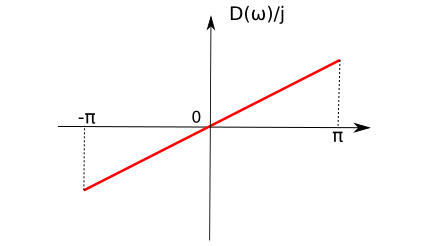

<br>
<center><span style="font-size:smaller">
Picture recreated from <a href="https://lost-contact.mit.edu/afs/inf.ed.ac.uk/group/teaching/matlab-help/R2016b/dsp/ref/differentiatorfilter.html">MIT Documentation</a>, license: <a href="https://uk.mathworks.com/">1994-2016 The MathWorks, Inc.</a>
</span></center>


# Linear Phase

Suppose you want to design a finite impulse response (FIR) filter that works well. There is one question needs to be 
answered. Should we use linear phase? Well, the answer should be yes. Since nonlinear phase in signal processing cause 
distortions in applications, it's not usually desired to have nonlinear phase FIR filter.

Not every finite impulse response (FIR) filter has linear phase such as maximum phase FIR filter and minimum phase FIR filter. However, majority of the FIR filters is designed to have a linear phase because the system is stable and efficiently works with linearity. 

In this notebook, we'll design FIR differentiator with a linear phase. Firstly, let's see the types of linear phase filters.

### <center>Types of the Linear Phase FIR filters </center>


|         | Filter order  |   $\gamma$  |     Symmetry    |
|:-------:|:-------------:|:------------:|:---------------:|
|  Type 1 |      Even     |   0, $\pi$   |  $h[k]$ = $h[m-k]$  |
|  Type 2 |      Even     | $\pm$ $\pi$/2 | $h[k]$ = -$h[m-k]$ |
| Type 3  |      Odd      |   0, $\pi$   |  $h[k]$ = $h[m-k]$  |
|  Type 4 |      Odd      | $\pm$ $\pi$/2 | $h[k]$ = -$h[m-k]$ |






<div class="alert alert-block alert-info">
They are also called as:
    <br>
<ul>
<li>Type 1 - Even Symmetric, even order $m$  
</li>
    <br>
    
<li>Type 2 - Odd Anti-Symmetric, even order $m$ 
</li>
    <br>
    
<li>Type 3 - Even Symmetric, odd order $m$
</li>
    <br>
    
<li>Type 4 - Odd Anti-Symmetric, odd order $m$
</li>

</ul>
</div>

### Type 1 - Linear Phase FIR Filter

As it can be understood from the name, this type must be symmetric along all coefficients. They have an even symmetry with respect to $k = m / 2$. 


\begin{equation} \label{eq:diff_type1}
\tag{3.4}
h[k]=h[m-k]\,e^{-j2\pi}=h[m-k];
\end{equation}
<br>
<br>

It also needs to satisfy the condition


\begin{equation}
\tag{3.5}
\gamma = 0\ \hbox{or} \ \pi,\quad h(m/2)\ne0
\end{equation}
<br>

for an even order $m = 22$. It means that centre coefficient is not equal to $0$

#### Proof of Symmetry
<br>

Let's put values into the $k$:

$h[0]=h[m]  \\
h[1]=h[m-1] \\
h[2]=h[m-2]  \\
h[3]=h[m-3]  \\
h[4]=h[m-4]$

$\vdots$

$h[k]=h[m-k]$ as it's given by Eq. (\ref{eq:diff_type1})

#### Proof of Equivalent


And for an order of $m = 22$:

$h[0]=h[22] \\
h[1]=h[21]  \\
h[2]=h[20]  \\
h[3]=h[19]  \\
h[4]=h[18]  $

$\vdots$

$h[11]=h[11] \ne0$

<br>


### Type 2 - Linear Phase FIR Filter

In Type 2 Linear Phase Filter, Impulse response of the system is given by 
<br>

\begin{equation} \label{eq:diff_type2}
\tag{3.6}
h[k]=h[m-k]\,e^{\pm j2\cdot \pi/2} = -h[m-k]\,.
\end{equation}

It also needs to satisfy the condition 
<br>

\begin{equation}
\tag{3.7}
\gamma = \pm \pi/2 \ ,\quad h(m/2) = 0
\end{equation}
<br>

with an even order $m = 22$. It means that centre coefficient $h[11]$ is equal to $0$ <br>


#### Proof of Anti-Symmetry


Let's put values into the $k$:

$h[0]=-h[m]  \\
h[1]=-h[m-1] \\
h[2]=-h[m-2]  \\
h[3]=-h[m-3]  \\
h[4]=-h[m-4] $

$\vdots$

$h[k]=-h[m-k]$.  As we see in the Eq. (\ref{eq:diff_type2})
<br>
<br>

#### Proof of Equivalent
And with even order $m = 22$:

$h[0]=-h[22] \\
h[1]=-h[21]  \\
h[2]=-h[20]  \\
h[3]=-h[19]  \\
h[4]=-h[18]  $

$\vdots$

$h[10]= -h[12] \\ 
 h[11]= -h[11] = 0$ 


It clarifies that impulses are anti-symmetric since there is negative sign in front of the $-h[m-k]$





### Type 3 -  Linear Phase FIR Filter

Impulse response of the system is given by
<br><br>
\begin{equation}\tag{3.8}
\label{eq:diff_sym_type3}
h[k]=h[m-k]\,e^{\pm j2\cdot \pi/2} = h[m-k]\,.
\end{equation}
<br>

For an odd filter order $m = 21$:
<br><br>

\begin{equation}\tag{3.9}
\label{eq:diff_eqv_type3}
\gamma = 0\ \hbox{or} \ \pi,\quad h((m-1)/2) \ne0
\end{equation}

<br>
centre coefficient $c = h(\left(m-1\right)/2) = h[10]$ is not equal to $0$. 



#### Proof of Symmetry
<br>
Let's put values into the $k$:

$h[0]=h[m]  \\
h[1]=h[m-1] \\
h[2]=h[m-2]  \\
h[3]=h[m-3]  $

$\vdots$

$h[k]=h[m-k]$ as it's given by Eq. (\ref{eq:diff_sym_type3})

#### Proof of Equivalent

For an order of $m = 21$:

$h[0]=h[21] \\
h[1]=h[20]  \\
h[2]=h[19]  \\
h[3]=h[18]  $

$\vdots$

$h[10]=h[11] \ne0$

<br>
<br>




### Type 4 -  Linear Phase FIR Filter

For an odd filter order $m = 21$:
<br><br>
\begin{equation} \tag{3.10}
\label{eq:diff_eqv_type4} 
\gamma = \pm \pi/2 \ ,\quad h((m-1)/2) \ne0
\end{equation}
<br>
centre coefficient $c  = h((m-1)/2) = h(10)$ is not equal to $0$.
<br><br>
Impulse response of the system is given by
<br><br>
\begin{equation} \tag{3.11}
\label{eq:diff_sym_type4}
h[k]=h[m-k]\,e^{\pm j2\cdot \pi/2} = -h[m-k]\,.
\end{equation}
<br>
<br>

#### Proof of Anti-Symmetry
<br>

Let's put values into the $k$:

$h[0]=-h[m]  \\
h[1]=-h[m-1] \\
h[2]=-h[m-2]  \\
h[3]=-h[m-3]  $

$\vdots$

$h[k]=-h[m-k]$.  As we see in the Eq. (\ref{eq:diff_sym_type4})
<br>
<br>

#### Proof of Equivalent
And for an odd order $m = 21$:

$h[0]=-h[21] \\
h[1]=-h[20]  \\
h[2]=-h[19]  \\
h[3]=-h[18]  $

$\vdots$

$h[10]= -h[11]\ne0$ 


It clarifies that impulses are anti-symmetric since there is a negative sign in the $-h[m-k]$





## Libraries used in this exercise
At the beginning, it's required to import relevant libraries into the code part.

### Scipy

 SciPy is mostly used library for signal processing since it has wide range of functions and implementations. That's why we initially <code>import scipy.signal as sig</code>. There are only three functions of <code>scipy.signal</code> to be used in this exercise:
<ol>
    <li><code>sig.firls(Lw, bands = , desired = )</code>: This function designs FIR filter using least square error minimisation method in order to approximate desired frequency response. First parameter $Lw$ is the filter order $m + 1$. The parameter <code>'bands'</code> is tried to bring the other parameter <code>'desired'</code>. In the parameter <code>'bands'</code>, band edges are defined in an array form. There are some requirements about the conditions of this parameter. First, edges must not be negative and must be less than Nyquist frequency (half of the sampling rate) or equal to the Nyquist frequency. Otherwise, it is inevitable to have distortion or artifacts in the signal. In the parameter <code>'desired'</code>, type must be also in the array form and same size with the parameter <code>'bands'</code>. It determines what gain of the each band must be. </li>
    <li><code>sig.freqz(b, 1, a)</code>: This function computes frequency response of the filter. </li>
    <li><code>sig.remez(Lw, bands = , desired = , type = '')</code>: This function computes coefficients of the filter. First parameter specifies the filter order $Lw = m + 1$. Second and third parameter have same role with the function <code>sig.firls()</code>. The only difference between them is the fourth parameter <code>type = 'differentiator'</code>. </li>

</ol>

### Matplotlib.pyplot

Matplotlib is a powerful library to visualise intermadiate results of our codes. It enables us to make lots of changes on the figures. It's going to be used <code>as plt</code>. In this exercise, mostly used attributes of the plt are <code>plt.figure()</code>, <code>plt.subplot()</code>, <code>plt.plot()</code>, <code>plt.title('')</code>, <code>plt.xlabel('')</code>, <code>plt.ylabel('')</code>, <code>plt.axis()</code>, <code>plt.stem()</code>, and <code>plt.grid()</code>

<ol>
    <li><code>plt.figure()</code>: This function creates a figure, optionally with defining a size with the parameter <code>figsize = (x,y)</code>. In this exercise, the size of the figure is set to ($x = 15$, $y = 4$) which means $15\ x \ 4$ inches for differentiator and ($x = 16$, $y = 4$) which means $16 \ x \ 4$ inches for impulse responses.</li>
    <li><code>plt.subplot()</code>: This function divides the size we set in figsize into several parts. If we divide x-axis into two parts, for first graph it is shown as: <code>plt.subplot(1,2,1)</code>, for second graph it is shown as: <code>plt.subplot(1,2,2)</code>. So that, we can show two graphs fitted to the figsize.</li> 
    <li><code>plt.plot()</code>: The values to be plotted are specified inside the function. For example;<code>plt.plot(w1/np.pi, np.abs(h1))</code>. Here, There are two parameters that are <code>w1/np.pi</code> and <code>np.abs(h1)</code>. The first parameter is normalised frequency $\Omega/\pi$. Second parameter is the absolute values in $dB$</li>
    <li><code>plt.title('')</code>: As a <code>string</code> type, Title, is determined and written at the top the graph. For example; <code>plt.title('Type 1 Even Symmetric')</code></li>
    <li><code>plt.xlabel('')</code>: This function puts a label into the x-axis. For example; <code>plt.xlabel('$\Omega/\pi$')</code></li>
    <li><code>plt.ylabel('')</code>: This function puts a label into the y-axis. For example; <code>plt.ylabel("$|H(exp(j*\Omega))|$ in dB")</code></li>
    <li><code>plt.axis()</code>: This function provides us to set the limit of the x and y axis all together. For example; <code>plt.axis([0, 22, -0.6, 0.6])</code>. Here, x-axis ranges from $0$ to $22$ while y axis ranges from $-0.6$ to $0.6$.</li>
    <li><code>plt.grid()</code>: This function plots the auxiliary lines in a grid form. It has few parameters but we'll not use them at the moment. </li>
    <li><code>plt.stem()</code>: This function plots the lines in a stem form which is common to visualise discrete signals. It has few parameters. For example; <code>plt.stem(b1, use_line_collection=True).</code> Unless it is put <strong>True</strong>, vertical lines will not appear. </li>
    
</ol>


### Numpy

Numpy is the last library that needs to be used in this exercise. It's going to be imported <code>as np</code>. Then, we'll use it now for math and calculations. In this exercise, some implementations of it is:

<ol>
    <li><code>np.abs()</code>: The absolute value is computed in this function. It's the short form of the <code>np.absolute()</code></li>
    <li><code>np.array()</code>: It forms an array. </li>
    <li><code>np.pi</code>: It is shown as $\Pi$. </li>
   
    
</ol>

Let's start to add relevant libraries into the cell. Fundamental libraries comes after the keyword <code>import</code>. Then, the keyword <code>as</code> specifies how it will be used. It makes our writing easier. For example, the library <code>numpy</code> will be used as <code>'as'</code>. It is easier to use.  

In [1]:
#LIBRARIES

import scipy.signal as sig              #signal processing library
import numpy as np                      #numpy for math 
import matplotlib.pyplot as plt         #plotting               
                                                

Generally, filter order will be expressed as $Lw$ in this notebook.

In [2]:
#INITIALISATON

order = 22         #filter order m
Lw = order + 1     #(m+1)th order for filter functions

<div class="alert alert-block alert-info">
    <strong><h3> Task 1.a </h3></strong> <br>
    Plot the absolute values of transfer function and impulse response of order $m = 21$ and $m = 22$. You can use <code>firl()</code> or <code>remez()</code> functions. Identify which differentiator refers to which class of FIR filters. 
</div>

As you remember from the Question notebook, the transfer function of an ideal differentiator is defined as:

\begin{equation}\label{GL5_4_4}\tag{3.1}
H\left(e^{j\Omega}\right) = j\Omega
\end{equation}

within the interval $[0, \pi]$  

Since differentiator is a finite impulse response (FIR) filter, the resulting impulse response $h(k)$ will be limited in time. 

Let's start to code this task.

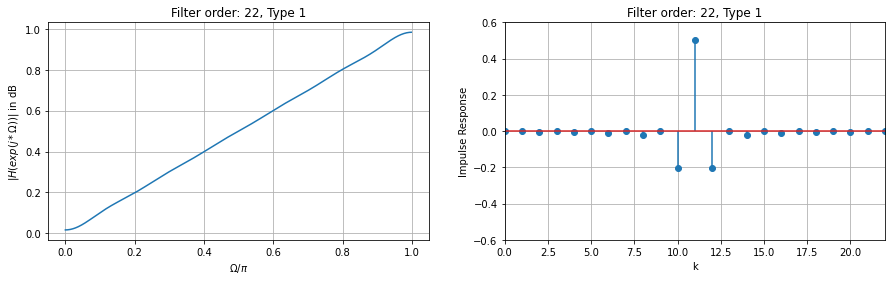

In [3]:

f1 = np.array([0, 1])                          #band edges array 
m1 = np.array([0, 1])                          #desired gain

b1 = sig.firls(Lw, bands = f1, desired = m1)   #firls function for differentiator
w1,h1 = sig.freqz(b1,1,512)                    #compute the frequency response of a digital filter.

plt.figure(figsize=(15,4))                     #set the size of the figure

plt.subplot(1,2,1)                             #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w1/np.pi, np.abs(h1))                 #plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")       #absolute value of the spectrum in dB 
plt.xlabel("$\Omega/\pi$")                     #Omega/pi
#plt.axis([0, 1, 0, 1])
plt.title("Filter order: " + str(Lw-1) + ", Type 1") #put title of the figure
plt.grid()                                           #configure the grid lines

plt.subplot(1,2,2)                             #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(b1, use_line_collection=True)         #plot the impulse response 
plt.ylabel("Impulse Response")                 #put name of y label
plt.xlabel("k")                                #put name of x label
plt.axis([0, 22, -0.6, 0.6])                   #set x and y axis
plt.title("Filter order: " + str(Lw-1) +  ", Type 1") #put title of the figure
plt.grid()                                     #configure the grid lines



The figure on the left shows the amplitude response representation of the system. Frequency is normalised to be able to analyse simply and observe the characteristics of the signal. The figure on the right gives us the impulse response representation of the system. When we look at the table at the beginning of the notebook, it's clear that this is a <strong>Type 1</strong> linear phase filter with even order $m$. 

array([-1.67473031e-03,  1.85625521e-17, -2.50175762e-03,  1.14835847e-18,
       -4.13555852e-03, -1.55562955e-19, -8.10569469e-03, -3.72537382e-19,
       -2.25158186e-02,  2.72543384e-19, -2.02642367e-01,  5.00000000e-01,
       -2.02642367e-01,  2.72543384e-19, -2.25158186e-02, -3.72537382e-19,
       -8.10569469e-03, -1.55562955e-19, -4.13555852e-03,  1.14835847e-18,
       -2.50175762e-03,  1.85625521e-17, -1.67473031e-03])

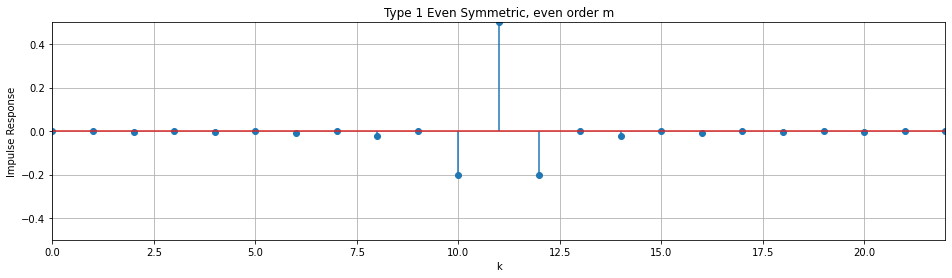

In [4]:
plt.figure(figsize=(16,4))              #set the size of the figure
plt.stem(b1, use_line_collection=True)  #plot the impulse response
plt.ylabel("Impulse Response")          #put name of y label
plt.xlabel("k")                         #put name of x label
plt.axis([0, 22, -0.5, 0.5])            #set x and y axises
plt.title("Type 1 Even Symmetric, even order m")      #put title of the figure
plt.grid()                              #configure the grid lines

b1

If you take a closer look at the impulse response graph, you will observe that the coefficients are symmetric and show us that almost every impulses are $0$ except the ones at the center. In order to prove that you can put variable <code>b1</code> at the end of the code above. When it is put:
    
    
| **$k$** 	| **Symmetric $k$** 	|  **$h[k]$ (Scientific notation)** |
|:---------:|:-----------------:|:-------------------------------:|
| $k[0]$   	| $k[22]$           	| -1.67473031e-03                 |
| $k[1]$   	| $k[21]$           	|         1.85625521e-17          |
| $k[2]$   	| $k[20]$           	|         -2.50175762e-03         |
| $k[3]$   	| $k[19]$           	|          1.14835847e-18         |
| $\vdots$  |$\vdots$           |              $\vdots$           |
| $k[10]$   	| $k[12]$           	|         -2.02642367e-01         |
| $k[11]$  	|    $-$           	|          5.00000000e-01         |

As you can see the table above, values until $k[10]$ (excluded) are so much close to $0$. 

$k[10] = k[12] = -0.2$. 

$k[11] = 0.5$. 


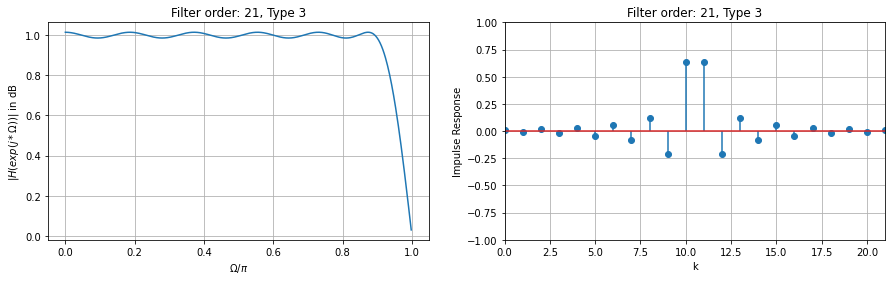

In [5]:
f2 = np.array([0.0, 0.45])                          #band edges array 
m2 = np.array([1.0])                                #desired gain

b2 = sig.remez(Lw-1,  f2, m2, fs = 1)               #remez function for differentiator
w3,h3 = sig.freqz(b2,1,512)                         #compute the frequency response of a digital filter
 
plt.figure(figsize=(15,4))                          #set the size of the figure

plt.subplot(1,2,1)                                  #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w3/np.pi,  np.abs(h3))                     #plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")            #absolute value of the spectrum in dB 
plt.xlabel("$\Omega/\pi$")                          #Omega/pi
#plt.axis([0, 1, 0, 1])
plt.title("Filter order: " + str(Lw-2) + ", Type 3")#put title of the figure
plt.grid()                                          #configure the grid lines

plt.subplot(1,2,2)                                  #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(b2, use_line_collection=True)              #plot the impulse response
plt.ylabel("Impulse Response")                      #put name of y label
plt.xlabel("k")                                     #put name of x label
plt.axis([0, 21, -1.0, 1.0])                        #set x and y axis
plt.title("Filter order: " + str(Lw-2) + ", Type 3")#put title of the figure
plt.grid()                                          #configure the grid lines



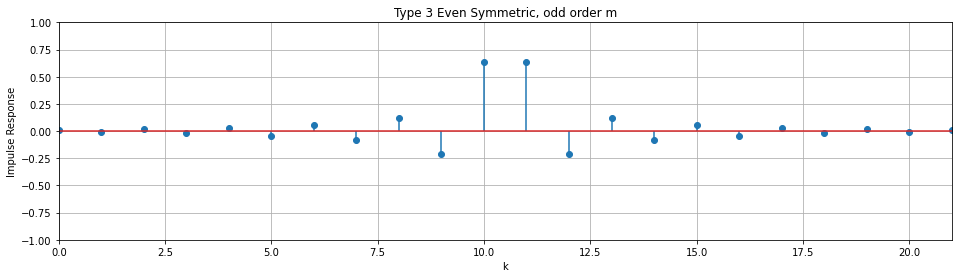

In [6]:
plt.figure(figsize=(16,4))                  #set the size of the figure
plt.stem(b2, use_line_collection=True)      #plot the impulse response
plt.ylabel("Impulse Response")              #put the name of y label
plt.xlabel("k")                             #put the name of x label
plt.axis([0, 21, -1, 1])                    #set x and y axis
plt.title("Type 3 Even Symmetric, odd order m")           #put title of the figure
plt.grid()                                  #configure the grid lines


This figure depicts impulse response representation of the differentiator that have band edges $[0.0, 0.45]$ and desired gain $[1.0]$ for order $m = 21$. At the first glance it can be understood that this is linear phase type $3$ filter since values are symmetric and order $m$ is odd

<div class="alert alert-block alert-info">
    <strong><h3> Task 1.b </h3></strong> <br>
    Plot the absolute values of transfer function and impulse response of order $m = 21$ and $m = 22$. You can use <code>remez()</code> functions with the parameter  <code>'type = differentiator'</code>. Identify which differentiator refers to which class of FIR filters. 
</div>

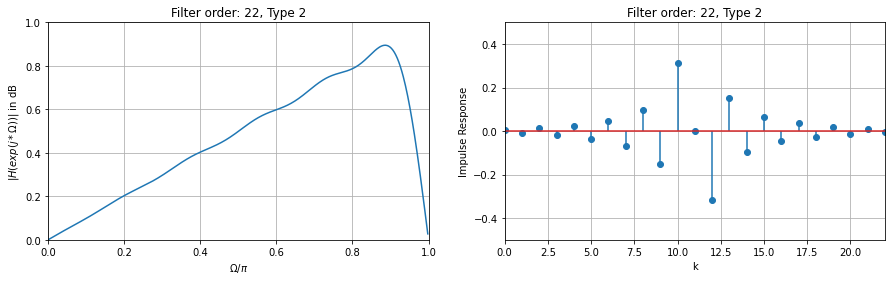

In [7]:
#Burası Tamam

f2 = np.array([0, 0.45])                   #band edges array 
m2 = np.array([2])                         #desired gain

b3 = sig.remez(Lw, bands = f2, desired = m2, type = 'differentiator')  #remez function for differentiator
w4,h4 = sig.freqz(b3,1,512)                 #compute the frequency response of a digital filter

plt.figure(figsize=(15,4))                  #set the size of the figure

plt.subplot(1,2,1)                          #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w4/np.pi, np.abs(h4))              #Plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")    #absolute value of the spectrum in dB 
plt.xlabel("$\Omega/\pi$")                  #Omega/pi
plt.axis([0, 1, 0, 1])                      #set x and y axises
plt.title("Filter order: " + str(Lw-1) + ", Type 2") #put title of the figure
plt.grid()                                  #configure the grid lines

plt.subplot(1,2,2)                          #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(b3, use_line_collection=True)      #Plot the impulse response
plt.ylabel("Impulse Response")              #put the name of y label
plt.xlabel("k")                             #put the name of x label
plt.axis([0, 22, -0.5, 0.5])                #set x and y axises
plt.title("Filter order: " + str(Lw-1) + ", Type 2") #put title of the figure
plt.grid()                                  #configure the grid lines



 Array bands are defined according to the question and it's observed that cut-off starts at $0.9$. In SciPy, there are some restrictions related to band edges otherwise it gives an error. They need to be monotonic and less than half of the sampling frequency $f_s$. So edge must be less than or equal to $0.5 f_s$. 

array([ 0.00495285, -0.01030444,  0.01294212, -0.0182499 ,  0.02539037,
       -0.03488577,  0.0478253 , -0.06642958,  0.09595289, -0.15224363,
        0.31480982,  0.        , -0.31480982,  0.15224363, -0.09595289,
        0.06642958, -0.0478253 ,  0.03488577, -0.02539037,  0.0182499 ,
       -0.01294212,  0.01030444, -0.00495285])

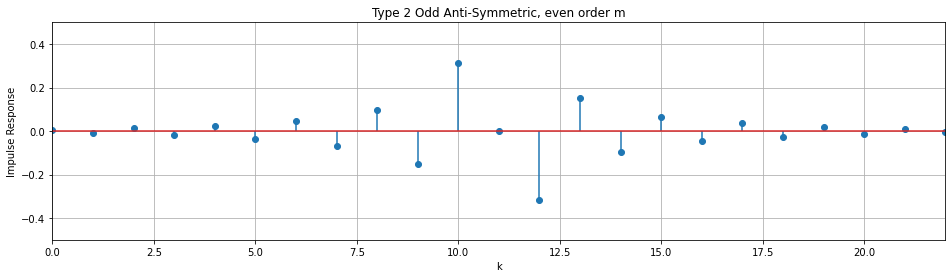

In [8]:
plt.figure(figsize=(16,4))                  #set the size of the figure
plt.stem(b3, use_line_collection=True)      #plot the impulse response
plt.ylabel("Impulse Response")              #put the name of y label
plt.xlabel("k")                             #put the name of x label
plt.axis([0, 22, -0.5, 0.5])                #set x and y axises
plt.title("Type 2 Odd Anti-Symmetric, even order m")     #put title of the figure
plt.grid()                                  #configure the grid lines

b3

As it can be seen from the impulse response representation that the impulse on the center is $0$. This filter has an anti-symmetric property. We can obtain that this filter is a <strong>Type 2</strong> linear phase filter for even order $m = 22$. When you look at the figure, there is a steady increase from $k[0]$ to $k[10]$. Then, the impulse response suddenly drops to $0$ in the centre discrete index $k = 11$. When you put <code>b3</code> at the end of the code above, you can analyse the values of the coefficient $h(k)$.  Let's see the coefficients $h(k)$ in the table below. 

|**$k$**|**Anti-Symmetric $k$**| 
|:--------------:|:---------------------:|
| $k[0]$ = 0.005   | $k[21]$ = -0.005        | 
| $k[1]$ = -0.010  | $k[20]$ = 0.010         |
| $k[2]$ =  0.013  | $k[19]$ = -0.013        |
| $k[3]$ = -0.018  | $k[18]$  = 0.018        |
| $\vdots$       | $\vdots$              |
| $k[10]$ =  0.315 | $k[12]$ = -0.315        |
| $k[11]$ =  0     |        $-$              |



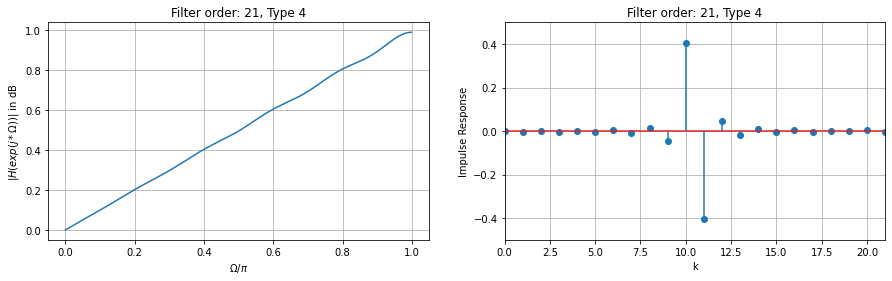

In [9]:

f1 = np.array([0, 0.5])                         #band edges array 
m1 = np.array([2])                              #desired gain

b4 = sig.remez(Lw-1, bands = f1, desired = m1, type = 'differentiator')   #remez function for differentiator
w2,h2 = sig.freqz(b4,1,512)                     #compute the frequency response of a digital filter

plt.figure(figsize=(15,4))                      #set the size of the figure

plt.subplot(1,2,1)                              #1st plot of the 2 plots. (It's gonna be visualised on the left)
plt.plot(w2/np.pi, np.abs(h2))                  #plot the amplitude response
plt.ylabel("$|H(exp(j*\Omega))|$ in dB")        #absolute value of the spectrum in dB 
plt.xlabel("$\Omega/\pi$")                      #Omega/pi
#plt.axis([0, 1, 0, 1])
plt.title("Filter order: " + str(Lw-2) + ", Type 4") #put title of the figure
plt.grid()                                      #configure the grid lines

plt.subplot(1,2,2)                              #2nd plot of the 2 plots. (It's gonna be visualised on the right)
plt.stem(b4, use_line_collection=True)          #plot the impulse response
plt.ylabel("Impulse Response")                  #put the name of y label
plt.xlabel("k")                                 #put the name of x label
plt.axis([0, 21, -0.5, 0.5])                    #set x and y axis
plt.title("Filter order: " + str(Lw-2) + ", Type 4") #put title of the figure
plt.grid()                                      #configure the grid lines




array([ 0.00199649, -0.00292212,  0.00185862, -0.00204966,  0.00257884,
       -0.00350073,  0.00513592, -0.00839047,  0.01632463, -0.04514061,
        0.40539212, -0.40539212,  0.04514061, -0.01632463,  0.00839047,
       -0.00513592,  0.00350073, -0.00257884,  0.00204966, -0.00185862,
        0.00292212, -0.00199649])

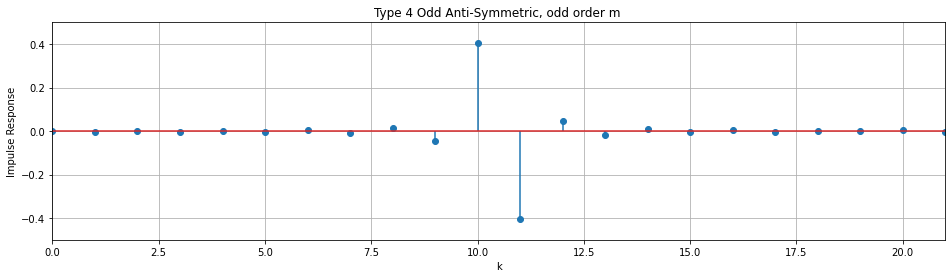

In [10]:
plt.figure(figsize=(16,4))                  #set the size of the figure
plt.stem(b4, use_line_collection=True)      #plot the impulse response
plt.ylabel("Impulse Response")              #put the name of y label
plt.xlabel("k")                             #put the name of x label
plt.axis([0, 21, -0.5, 0.5])                #set x and y axises
plt.title("Type 4 Odd Anti-Symmetric, odd order m ")     #put title of the figure
plt.grid()                                  #configure the grid lines
 
b4

There is no strong ripples in the amplitude response representation. This filter has an anti-symmetric property. We can obtain that this filter is a type $4$ linear phase filter for an odd order $m = 21$. Impulse response figure also show us that almost every impulses are $0$ except the ones $k[10]$ and $k[11]$. Let's put <code>b4</code> at the end of the code above. Table below shows the variables of impulse response $h(k)$.

| **$k$** 	| **Anti-Symmetric $k$** 	| 
|:---------:|:---------------------:|
|$k[0]$ = 0.002 | $k[21]$ = -0.002  | 
|$k[1]$ = -0.003| $k[20]$ = 0.003   |
|$k[2]$ = 0.002 | $k[19]$ = -0.002  |
|$k[3]$ = -0.002| $k[18]$  = 0.002  |
|$\vdots$     |$\vdots$         |
|$k[10]$ = 0.405 | $k[11]$ = -0.405 |

So, amplitudes are same but signs are different. Each discrete $k$ has anti-symmetric $k$. So, it can be seen that it is type $4$ anti-symmetric impulse response. You'll also notice that there is a major leap from $k[9]$ to $k[10]$. 





## References

1) [[MP73]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.remez.html#scipy.signal.remez) J. H. McClellan and T. W. Parks, "A unified approach to the design of optimum FIR linear phase digital filters", IEEE Trans. Circuit Theory, vol. CT-20, pp. 697-701, 1973.

2) [[KK02]](https://doi.org/10.1007/978-3-663-09805-8)  K.-D. Kammeyer and K. Kroschel, "Nichtrekursive Filter", 2002, pp. 157–217. 